# Time Series Prediction with LSTM Recurrent Neural Networks for Airline Passengers Data

## Problem Statement: 
### The problem we are going to look here is the International Airline Passengers prediction problem.This is a problem where, we are given a year and a month, the task is to predict the number of international airline passengers in units of 1,000. The data ranges from January 1949 to December 1960, or 12 years, with 144 observations. 

### We first import the dataset given and analyze how the data is represented inside the graph.

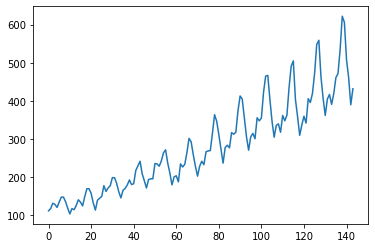

In [4]:
import pandas
import matplotlib.pyplot as plt
dataset = pandas.read_csv('airline-passengers.csv', usecols=[1], engine='python')
plt.plot(dataset)
plt.show()

### What we see above is that the graph has an ''upward trend'' . It indicates that there has been increase in passengers each year.

# LSTM model of airline passengers data using "Univariate"  time series forecasting :

### What is Univariate time series forecasting : In simple words it is a regular LSTM model that comprised of a single series of observations and a model is required to learn from the series of past observations to predict the next value in the sequence.
### There are total 6 types of Univariate LSTM but we are going to work on only Vanilla LSTM 

# Vanilla LSTM:
### A Vanilla LSTM is an LSTM model that has a single hidden layer of LSTM units, and an output layer used to make a prediction. For example: model.add(Dense(1)) . What this shows is that we have a single hidden layer for our prediction.


# LSTM for Regression:
### We are now going to predict the number of passengers in the next month using the previous data. We can write a simple function to convert our single column of data into a two-column dataset: the first column containing this month’s (t) passenger count and the second column containing next month’s (t+1) passenger count, to be predicted.  

### We will now import all the necessary modules that are required for our prediction model.

In [5]:
import numpy
import matplotlib.pyplot as plt
import pandas as pd
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler  #Default range is from 0-1
from sklearn.metrics import mean_squared_error 

### Here we have imported modules like Numpy that helps for high-level mathematical functions in this problem:
### Matplotlib: which will help in plotting the graph for visual representation. 
### Pandas: which will help for handling the given dataset.  
### Sklearn:  that contains a lot of efficient tools like classification, regression, clustering and dimensionality reduction, we  use MinMax Scaler because it preserves the shape of the original distribution. We also import Mean_Squared_Error because estimator measures the average of error squares i.e. the average squared difference between the estimated values and true value. 
### Keras: Here we import Sequential ,  Dense and LSTM. Sequential helps us to train model using layers, Dense helps us in activation function by providing it arguments, LSTM the main layer to process the model and give us the output.

### We first fix the random number seed to ensure our results are reproducible.

In [6]:
numpy.random.seed(7)

### Then we call upon the dataset to extract the NumPy array from the dataframe and convert the integer values to floating point values, which are more suitable for modeling for a neural network to give its prediction.

In [7]:
dataframe = pandas.read_csv('airline-passengers.csv', usecols=[1], engine='python') #read the datset using pandas
dataset = dataframe.values # convert it to numpy array
dataset = dataset.astype('float32') # Integer value to float

###  Here we rescale the data to the range of 0 to 1 to normalizing. We can easily do that using the MinMaxScaler  from the scikit-learn library.

In [8]:
scaler = MinMaxScaler(feature_range=(0, 1)) # normalize the dataset
dataset = scaler.fit_transform(dataset)

### Below what we do is split the dataset into train and test dataset. We multiply the length of dataset to 0.70 in order to convert it to training dataset i.e 70 % data will be converted to training data set. The rest of dataset is now converted to test sets(30%).

In [9]:
train_size = int(len(dataset) * 0.70) #estimate size of training data
test_size = len(dataset) - train_size #estimate size of test data
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:] # to calculate the split points in dataset
print(len(train), len(test)) 

100 44


### We create a function named create_dataset that takes 2 parameters named dataset and look_back. Dataset is an array that is converted to a dataset, and look_back is the number of previous time steps to use as input variables to predict the next time period.
### What it does is it will create a dataset where X is the number of passengers at a given time t and Y is the number of passengers at the next time t+1.


In [10]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1): # 2 parameters
	dataX, dataY = [], []   #convert into array
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

### We now call the above function into action and prepare the datasets. We have called the function below.

In [11]:
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

### Using numpy.reshape() below what we do is we change the data into the form [samples, time steps, features]. Earlier we had it in the form [samples, feature].

In [12]:
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

### Lets now create and fit the model using keras libraries that we had call upon earlier. The network has a visible layer with 1 input, a hidden layer with 4 LSTM blocks or neurons, and an output layer that makes a single value prediction. The default sigmoid activation function is used for the LSTM blocks. The network is trained for 110 epochs and a batch size of 1 is used.

In [13]:
model = Sequential() #activation function
model.add(LSTM(4, input_shape=(1, look_back))) # Hidden layer with 4 neurons
model.add(Dense(1)) # visible layer
model.compile(loss='mean_squared_error', optimizer='adam') # compile and find mean square error
model.fit(trainX, trainY, epochs=110, batch_size=1, verbose=2) # Get the output of the model

Epoch 1/110
98/98 - 0s - loss: 0.0432
Epoch 2/110
98/98 - 0s - loss: 0.0201
Epoch 3/110
98/98 - 0s - loss: 0.0154
Epoch 4/110
98/98 - 0s - loss: 0.0142
Epoch 5/110
98/98 - 0s - loss: 0.0131
Epoch 6/110
98/98 - 0s - loss: 0.0122
Epoch 7/110
98/98 - 0s - loss: 0.0113
Epoch 8/110
98/98 - 0s - loss: 0.0104
Epoch 9/110
98/98 - 0s - loss: 0.0094
Epoch 10/110
98/98 - 0s - loss: 0.0083
Epoch 11/110
98/98 - 0s - loss: 0.0073
Epoch 12/110
98/98 - 0s - loss: 0.0064
Epoch 13/110
98/98 - 0s - loss: 0.0055
Epoch 14/110
98/98 - 0s - loss: 0.0045
Epoch 15/110
98/98 - 0s - loss: 0.0038
Epoch 16/110
98/98 - 0s - loss: 0.0032
Epoch 17/110
98/98 - 0s - loss: 0.0028
Epoch 18/110
98/98 - 0s - loss: 0.0025
Epoch 19/110
98/98 - 0s - loss: 0.0024
Epoch 20/110
98/98 - 0s - loss: 0.0023
Epoch 21/110
98/98 - 0s - loss: 0.0022
Epoch 22/110
98/98 - 0s - loss: 0.0022
Epoch 23/110
98/98 - 0s - loss: 0.0022
Epoch 24/110
98/98 - 0s - loss: 0.0021
Epoch 25/110
98/98 - 0s - loss: 0.0022
Epoch 26/110
98/98 - 0s - loss: 0.

### Finally we make the predictions of the model using our dataset. We estimate the performance of the model on the train and test datasets given below. We invert the predictions before calculating error scores to make sure that performance is shown in the same way with same units as the original dataset that we have used.

In [14]:

trainPredict = model.predict(trainX) # make predictions
testPredict = model.predict(testX)   # make predictions

trainPredict = scaler.inverse_transform(trainPredict) # invert the predictions
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0])) # calculate root mean squared error
print('Train Score: %.2f RMSE' % (trainScore)) #print the mean square error
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0])) 
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 23.48 RMSE
Test Score: 49.54 RMSE


### We generate predictions using the model for both the train and test dataset to get a graphical representation of the model. Because of how the dataset was prepared, we must shift the predictions so that they align on the x-axis with the original dataset. Once prepared, the data is plotted, showing the original dataset in blue, the predictions for the training dataset in green, and the predictions on the unseen test dataset in red.

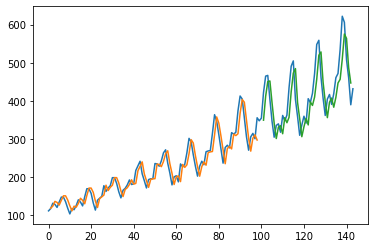

In [15]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

plt.plot(scaler.inverse_transform(dataset)) # plot baseline and predictions
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show() # shows the graph properly

# After running the program for 110 epochs and getting a loss of nearly 0.0021 we get our final graphical represenatation and model fits both datasets perfectly. Its very accurate model.